# Tarea 1 Evaluada

- Optimización estocástica
- MA2004B.101
- Profesor: Jaime Eduardo Martínez Sánchez

| Alumno  | Matrícula |
| :-----: |  :-----:  |
| Verónica Victoria García De la Fuente | A00830383 |
| Emily Rebeca Méndez Cruz              | A00830768 |
| Daniel de Zamacona Madero             | A01570576 |
| Eugenio Santiesteban Zolezzi          | A01720932 |
| Juan Pablo Echeagaray González        | A00830646 |

- 11 de agosto del 2022

In [1]:
# Dependencias básicas
import random
import matplotlib.pyplot as plt
import numpy as np

# Estilo de gráfica y semilla para reproducibilidad
plt.style.use('ggplot')
random.seed(7501)

# Parámetros generales
max_iter = 1e3


## El Problema de Monty Hall

En un concurso se tienen tres puertas, detrás de una de ellas hay un auto y detrás de las otras hay una cabra. El participante debe elegir una de las tres puertas, sin abrirla. Después Monty, el presentador, abre una de las dos puertas restantes en la que hay una cabra. Así quedan dos puertas sin abrir una con auto y otra con cabra. Monty ofrece la posibilidad al concursante de cambiar su puerta o permanecer con su elección. ¿Qué es mejor, cambiar de puerta o no? (Este problema es uno de los más controversiales en probabilidad y se basa en un programa de televisión de los 70's).


Proporción de victorias con el cambio de puerta: 0.68


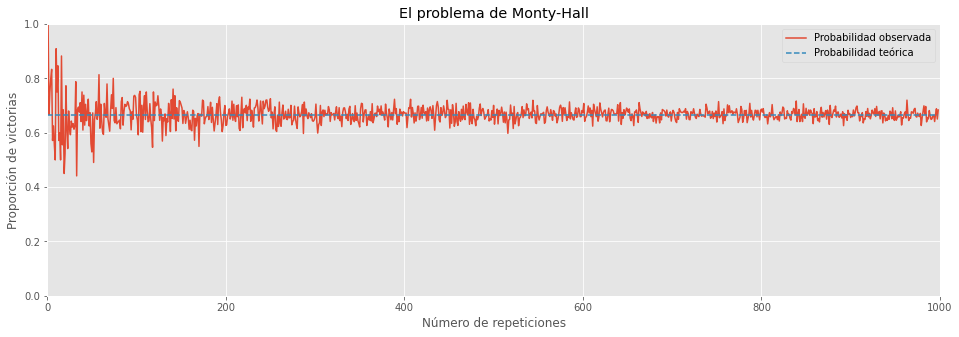

In [2]:
def problema_1():
    
    n_doors = 3

    def monty_hall(bin_switch, n_doors, num_tests):

        def get_non_prize_door(host: int, num_doors: int, player_choice: int):
            i = 1
            if (host > num_doors) or (player_choice > num_doors):
                raise ValueError("There aren't enough doors")
            while (i == host or i == player_choice):
                i = (i + 1) % num_doors
            return i


        def switch_function(shown_door, num_doors, player_choice):
            i = 1
            while (i == shown_door) or (i == player_choice):
                i = (i + 1) % num_doors

            return i

        win_switch_cnt = 0
        win_no_switch_cnt = 0
        lose_switch_cnt = 0
        lose_no_switch_cnt = 0
        # doors = [i for i in range(n_doors)]

        for i in range(int(num_tests)):
            door_with_prize = random.randint(0, n_doors - 1)
            host = door_with_prize
            player_choice = random.randint(0, n_doors - 1)
            shown_door = get_non_prize_door(host, n_doors, player_choice)

            if bin_switch:
                player_choice = switch_function(shown_door, n_doors, player_choice)

            if player_choice == host and bin_switch == False:
                # print("Player won with no switch")
                win_no_switch_cnt += 1
            elif player_choice == host and bin_switch == True:
                # print("Player won with switch")
                win_switch_cnt += 1
            elif player_choice != host and bin_switch == False:
                # print("Player lost with no switch")
                lose_no_switch_cnt += 1
            elif player_choice != host and bin_switch == True:
                # print("Player lost with switch")
                lose_switch_cnt += 1
            else:
                print('Something went wrong')

        return win_switch_cnt, win_no_switch_cnt, lose_switch_cnt, lose_no_switch_cnt

    win_prop = []

    for i in range(1, int(max_iter)):
        y = monty_hall(True, n_doors, i)
        win_prop.append(y[0] / i)
        
    plt.figure(figsize=(16, 5))
    plt.plot(np.arange(max_iter - 1), win_prop, '-', label='Probabilidad observada')
    plt.plot(np.arange(max_iter - 1), np.ones(int(max_iter) - 1) * (2/3), '--', label='Probabilidad teórica')
    plt.xlim(0, max_iter)
    plt.ylim(0, 1)
    plt.xlabel('Número de repeticiones')
    plt.ylabel('Proporción de victorias')
    plt.legend()
    plt.title('El problema de Monty-Hall');

    print(f'Proporción de victorias con el cambio de puerta: {win_prop[-1]:.2f}')

problema_1()


Una forma intuitiva de interpretar el resultado empírico obtenido, es pensar que en el momento en que el presentador descarta una de las puertas, se redistribuyen las propiedades originales que estaban asignadas a cada puerta.

Al comienzo del experimento, cada puerta tiene una probabilidad de 1/3 de tener un auto. Cuando el concursante selecciona una puerta, las 2 restantes tienen una posibilidad de 2/3 partes de tenerlo detrás; pero cuando el presentador abre una de estas 2 puertas, la probabilidad de 2/3 se _concentra_ en la puerta restante, por lo que la mejor decisión es siempre cambiar de puerta.

## La bola de futbol

En un refresco que compró Juan en la pulpería la MINITA, cercana a su colegio, se ganó una bola de fútbol. Sin embargo, al reclamar su premio en la MINITA, la encargada le indicó que el premio solamente se lo puede dar el camión repartidor y únicamente pasa el martes entre 10 am y 11 am aleatoriamente, y en la pulpería se queda exactamente 10 minutos. Dado que Juan está en clases ese día, decide elegir al azar un tiempo entre 10:00 am y 11:00 am para fugarse de clases y esperar en la pulpería exactamente diez minutos para ver si logra encontrarse con el camión repartidor. ¿Cuál es la probabilidad de que el martes obtenga su premio?


Probabilidad relativa: 0.311311


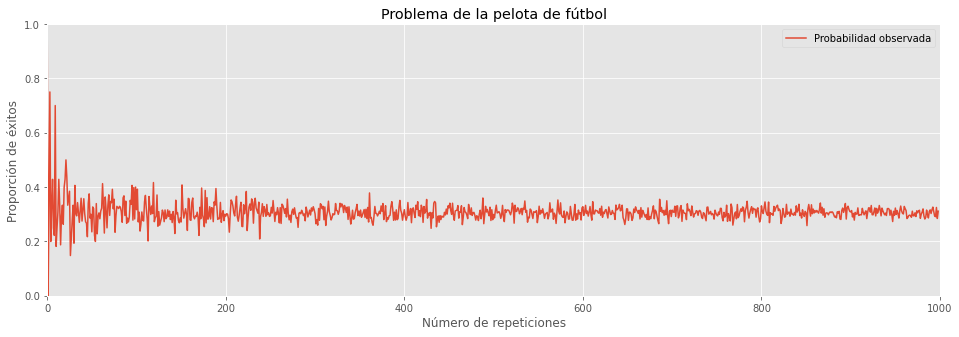

In [3]:
def problema_2():
    
    def futbol_ball(n_hours, wait_time, n_simulations):

        results = []

        for i in range(n_simulations):
            juan_arrival = n_hours * random.random() * 60
            truck_arrival = n_hours * random.random() * 60

            if abs(juan_arrival - truck_arrival) <= wait_time:
                res = 1
            else:
                res = 0
            
            results.append(res)
        
        return results

    results = []
    for i in range(1, int(max_iter)):
        res = futbol_ball(1, 10, i)
        win_prop = sum(res) / i
        results.append(win_prop)

    plt.figure(figsize=(16, 5))
    plt.plot(np.arange(max_iter - 1), results, '-', label='Probabilidad observada')
    plt.xlim(0, max_iter)
    plt.ylim(0, 1)
    plt.xlabel('Número de repeticiones')
    plt.ylabel('Proporción de éxitos')
    plt.legend()
    plt.title('Problema de la pelota de fútbol');

    print(f'Probabilidad relativa: {results[-1]:2f}')

problema_2()


## La Ley de los grandes números

Explore con Excel la siguiente proposición: De acuerdo con la Ley de los Grandes Números, entre más veces se tira una moneda, más cerca se estará el número obtenido de escudos de la mitad del total de los lanzamientos.

La proposición del ejercicio anterior es falsa. La Ley de los grandes Números se refiere a valores relativos no absolutos. Dicha afirmación es una mal-interpretación frecuente de la Ley de los grandes números y se desmiente en el siguiente problema.

Probabilidad relativa: 0.515516


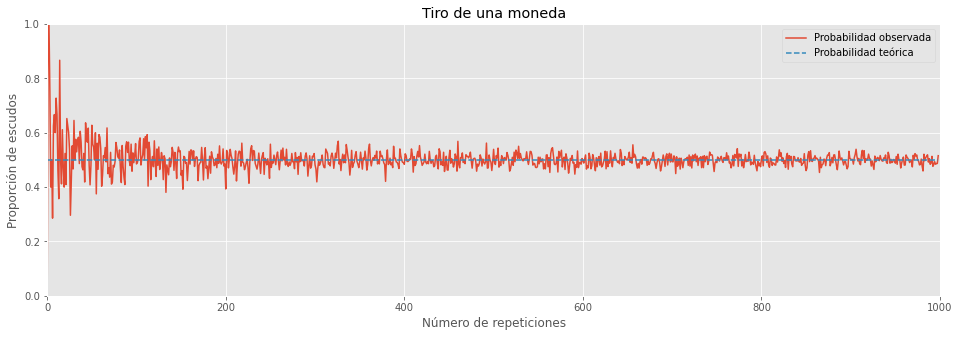

In [4]:
def problema_3():

    def toss_coin(n_simulations):
        results = []

        for i in range(n_simulations):
            res = random.randint(0, 1)
            results.append(res)
        
        return results

    # Supondremos que un valor de 1 se asigna a "Escudos"
    results = []
    for i in range(1, int(max_iter)):
        res = toss_coin(i)
        win_prop = sum(res) / i
        results.append(win_prop)

    plt.figure(figsize=(16, 5))
    plt.plot(np.arange(max_iter - 1), results, '-', label='Probabilidad observada')
    plt.plot(np.arange(max_iter - 1), np.ones(int(max_iter) - 1) * (1/2), '--', label='Probabilidad teórica')
    plt.xlim(0, max_iter)
    plt.ylim(0, 1)
    plt.xlabel('Número de repeticiones')
    plt.ylabel('Proporción de escudos')
    plt.legend()
    plt.title('Tiro de una moneda');

    print(f'Probabilidad relativa: {results[-1]:2f}')

problema_3()


![](2022-08-11-14-20-49.png)

Aquí podemos visualizar el comportamiento de la Ley de Los Grandes Números; se repite 1,000 veces el experimento de lanzar una moneda al aire, pero en cada uno de esos experimentos se repite el evento una vez más, es decir, cuando llegamos al experimento 1,000, en este se habrán obtenido 1,000 muestras del evento en particular.

Observamos que mientras el número de repeticiones sea mayor, existe una variación menor en la proporción de tiros que resultan en escudos, podríamos decir que la verdadera probabilidad será el valor al cual esta proporción converja en el límite, este valor teórico es de 0.5.

## El falso determinismo

Un software asegura que detecta el 90% de los fraudes bancarios que ocurren en las tarjetas. Ante esto el Banco de Los Sueños decide adquirir el software para detectar los fraudes que les ocurren a sus clientes en las tarjetas. Sin embargo, en el primer momento de uso, el software no detectó un fraude.

El banco decide demandar a la empresa, pero al revisar el software, resulta que los cálculos están bien hechos. ¿Qué está sucediendo entonces?

Probabilidad relativa: 0.901902


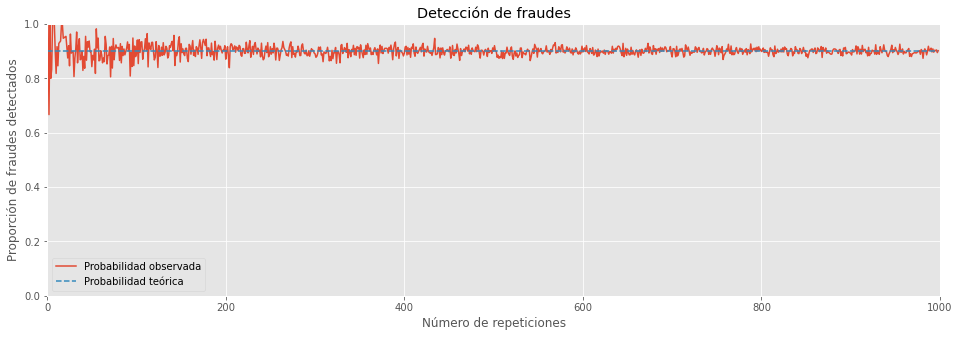

In [5]:
def problema_4():
    prob = 0.9
    np.random.seed(7501)

    results = []
    for i in range(1, int(max_iter)):
        test = np.random.choice([0, 1], size=i, p=[1-prob, prob])
        win_prop = sum(test) / i
        results.append(win_prop)

    plt.figure(figsize=(16, 5))
    plt.plot(np.arange(max_iter - 1), results, '-', label='Probabilidad observada')
    plt.plot(np.arange(max_iter - 1), np.ones(int(max_iter) - 1) * prob, '--', label='Probabilidad teórica')
    plt.xlim(0, max_iter)
    plt.ylim(0, 1)
    plt.xlabel('Número de repeticiones')
    plt.ylabel('Proporción de fraudes detectados')
    plt.legend()
    plt.title('Detección de fraudes');

    print(f'Probabilidad relativa: {results[-1]:2f}')

problema_4()

En el caso del sistema de detección de fraudes, vemos que la Ley de Los Grandes Números revela que el sistema tiene el comportamiento descrito por la empresa, en el límite cuando el número de fraudes se aproxima al infinito, el sistema detectará el 90% de los fraudes.

Para el caso de 1 experimento en el que solamente se tome una muestra, existe una probabilidad de 0.1 de que el sistema no lo detecte; si bien este valor no es alto, sigue siendo un evento posible.

## Resumen: Probabilidad de ruina en el modelo clásico de Cramer-Lundberg

> Jiménez Hernández, J. D. C., & Maldonado Santiago, A. D. (2011). Probabilidad de ruina en el modelo clásico de Cramer-Lundberg. REPOSITORIO NACIONAL CONACYT.

El riesgo actuarial busca delimitar si las compañías aseguradoras tienen la capacidad económica de solventar las situaciones que se presenten y hasta qué nivel. Se describe la estructura general de las compañías de seguros, las cuales consisten en un sistema en el cual las personas vulnerables ante algún riesgo realizan el pago de una prima a la compañía, la cual se compromete a cubrir los gastos generados en caso de que el accidente en cuestión diese lugar. El modelo más utilizado para situaciones de la vida real es el _Modelo clásico de Cramer-Lundberg_. Para encontrar la probabilidad de tener reservas menores a cero en cierto intervalo de tiempo, este modelo toma en cuenta el capital inicial, la cantidad de dinero que se recibe en cada unidad de tiempo así como el número de reclamos y tamaño de los mismos. Así, el capital de la compañía es igual a la suma entre el capital inicial y el producto de la prima por el tiempo deseado, menos la suma de los tamaños de las reclamaciones realizadas a lo largo del tiempo t. Esto se puede ver a través de la siguiente fórmula:

$$X(t) = u + ct - \sum_{k=1}^{N(t)}Z_k$$

Donde $u$ representa el capital inicial; $c$ es una constante que representa la prima que pagan los clientes por cada unidad de tiempo; $t$ es el tiempo en el cual se busca encontrar el valor del capital; $Z_k$ siendo el tamaño de las reclamaciones realizadas en el intervalo de tiempo $[0,t]$ y $N(t)$ la cantidad de dichas reclamaciones. En este caso se asume que se tiene una distribución de acuerdo a un proceso de _Poisson_. Al graficar el comportamiento de la función $X(t)$ se observan aumentos al momento de obtener las primas y decrementos cuando surgen las reclamaciones. En el momento en que $X(t) < 0$, se considera que la compañía está en ruina, en este tipo de casos se puede recuperar a través de préstamos.

Además de esto, se utiliza $\phi(u)$ para representar la probabilidad de ruina a partir de un capital inicial $u$; sin embargo, no hay una forma generalizada y analítica de calcular este valor, por lo que se buscan aproximaciones. Entre ellas se encuentra la aproximación de _Cramer-Lundberg (C-L)_, en este se calcula un valor $R$ llamado coeficiente de ajuste, entre más pequeño sea el valor del mismo, mayor es el riesgo de ruina. 

Por otra parte, a través de la aplicación de transformadas de _Laplace_ se puede obtener una probabilidad exacta, sin embargo esto solo se puede realizar cuando la inversa de la transformada de Laplace es calculable. Continuando con las opciones para el cálculo de este valor, se tiene la fórmula de _Pollaczek-Khinchin_, la cual, a pesar de su complejidad se utiliza en el algoritmo de _Panjer_ para generar aproximaciones de la probabilidad de ruina a través del uso de una fórmula de recursividad.

Partiendo de las aproximaciones anteriormente descritas, se presentan ejemplos de casos particulares en los cuales se aplican. El primero consiste en reclamos que son mezcla de exponenciales. Utilizando distintos valores de capital inicial entre 0 y 2 inclusivos. En este caso, gracias al uso de la transformada de Laplace se obtiene un resultado analítico con el cual comparar la probabilidad de ruina obtenida con el algoritmo de _Panjer_ y la aproximación de _C-L_. Se observa que el error utilizando el algoritmo de _Panjer_ se vuelve ligeramente menos negativo conforme el valor de u aumenta, a diferencia del caso de _C-L_, el cual tiene un aumento en el error de forma considerablemente más rápida que el caso anterior. Esto nos indica que de forma general el algoritmo de _Panjer_ permite obtener aproximaciones más exactas. A su vez, se observa que conforme aumenta la cantidad de capital inicial, a su vez disminuye la probabilidad de ruina. Esto se comprueba al realizar una simulación de diferentes capitales iniciales del caso exponencial. En el caso de tener un capital inicial de cero, la mitad de las simulaciones se encuentran por debajo del cero. Entre más aumenta la cantidad de capital inicial, una cantidad menor de los resultados se encuentran por debajo del cero. Por otra parte, partiendo de que se tiene una distribución mezcla de exponenciales, las trayectorias obtenidas como respuesta son crecientes y se encuentran por encima del cero.

El siguiente ejemplo consiste en reclamos que se distribuyen de acuerdo con una distribución gamma, en este caso no se puede obtener la inversa de la transformada de Laplace, por lo cual se requiere el uso de diferentes métodos, en este caso el algoritmo de _Panjer_ y la aproximación de _Cramer-Lundberg_. A través de los resultados obtenidos se observa que las probabilidades de ruina con este tipo de distribución son mayores que en la situación planteada anteriormente. Asimismo se repite la relación inversa entre el capital inicial y la probabilidad de ruina. Nuevamente se realiza una simulación, en este caso se utiliza un capital inicial de 1 y de 2.25. Se obtiene, al igual que el caso anterior, que la mitad de las trayectorias están por encima del cero con el valor menos de capital inicial, mientras que al aumentarlo, la cantidad de trayectorias por encima del cero se incrementa.

Se concluye que se observaron mejores resultados en los casos particulares utilizando el algoritmo de Panjer. Asimismo, se reconoce que hay factores que no fueron tomados en cuenta al realizar las aproximaciones a la vez que se admite su utilidad como modelo de estudio.
